<a href="https://colab.research.google.com/github/hyunj941031/ds-sa-cp2/blob/main/web_click.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/fashion_campus_dataset/web_click.csv')

In [ ]:
data.tail()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
1285293,f38416ce-51f2-46b0-a476-776d8fed1cb0,SEARCH,2021-08-01T08:03:07.737783Z,4e527503-27e3-4cbc-8964-23896c34fa96,WEB,NaN,NaN,NaN,NaN,Sepatu Adidas,NaN,NaN
1285294,c1ce86f6-858b-4009-af5b-f1483a28d020,HOMEPAGE,2020-09-22T22:30:52.674560Z,74ae05ad-1c63-493f-88d3-cd225cb5ceb5,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1285295,c1ce86f6-858b-4009-af5b-f1483a28d020,ADD_TO_CART,2020-09-22T22:45:47.674560Z,83bf5984-1a3b-438d-94fd-23d451dfb73b,WEB,25127.0,1.0,166365.0,NaN,NaN,NaN,NaN
1285296,c1ce86f6-858b-4009-af5b-f1483a28d020,BOOKING,2020-09-22T23:15:15.843895Z,c00f477c-3007-4707-a287-cd9c2c40dbd0,WEB,NaN,NaN,NaN,Success,NaN,NaN,NaN
1285297,c1ce86f6-858b-4009-af5b-f1483a28d020,SEARCH,2020-09-22T22:44:59.674560Z,cbc4e8e5-aa48-40c6-8e69-07382e1d35bc,WEB,NaN,NaN,NaN,NaN,Barang Bekas,NaN,NaN


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

web_click = data.copy()
web_click['session_id'] = label_encoder.fit_transform(web_click['session_id'])

web_click = web_click.drop(['event_id', 'traffic_source'], axis=1)

web_click['event_time'] = pd.to_datetime(web_click['event_time'])
web_click['year'] = web_click['event_time'].dt.year

web_click

,session_id,event_name,event_time,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,year
0,76330,HOMEPAGE,2019-09-23 20:17:49.425431+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,76330,ADD_TO_CART,2019-09-24 01:15:27.425431+00:00,25875.0,4.0,287362.0,NaN,NaN,NaN,NaN,2019
2,76330,ADD_TO_CART,2019-09-24 06:13:46.425431+00:00,4790.0,1.0,262894.0,NaN,NaN,NaN,NaN,2019
3,76330,ADD_TO_CART,2019-09-24 11:14:14.425431+00:00,30881.0,1.0,88678.0,NaN,NaN,NaN,NaN,2019
4,76330,ADD_PROMO,2019-09-24 16:16:10.425431+00:00,NaN,NaN,NaN,NaN,NaN,BUYMORE,4903.0,2019
...,...,...,...,...,...,...,...,...,...,...,...
1285293,85302,SEARCH,2021-08-01 08:03:07.737783+00:00,NaN,NaN,NaN,NaN,Sepatu Adidas,NaN,NaN,2021
1285294,68080,HOMEPAGE,2020-09-22 22:30:52.674560+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
1285295,68080,ADD_TO_CART,2020-09-22 22:45:47.674560+00:00,25127.0,1.0,166365.0,NaN,NaN,NaN,NaN,2020
1285296,68080,BOOKING,2020-09-22 23:15:15.843895+00:00,NaN,NaN,NaN,Success,NaN,NaN,NaN,2020


# Booking

In [ ]:
sess = set(web_click['session_id'].unique())
len(sess)

89651

In [ ]:
web_click['event_name'].value_counts()

CLICK          250581
HOMEPAGE       249895
ADD_TO_CART    193681
SCROLL         166391
ITEM_DETAIL    128844
SEARCH         117202
BOOKING         85328
PROMO_PAGE      60679
ADD_PROMO       32697
Name: event_name, dtype: int64

In [ ]:
85328/89651

0.9517796789773678

In [ ]:
book = web_click[web_click.event_name == 'BOOKING']['session_id'].unique()
book_sess = set(book)
len(book_sess)

85328

In [ ]:
len(sess - book_sess)

4323

In [ ]:
book_succ = web_click[(web_click.event_name == 'BOOKING') & (web_click.payment_status == 'Success')]['session_id'].unique()
book_fail = web_click[(web_click.event_name == 'BOOKING') & (web_click.payment_status == 'Failed')]['session_id'].unique()
len(book_succ), len(book_fail)

(81729, 3599)

In [ ]:
no_book = list(sess - book_sess)
len(no_book)

4323

In [ ]:
target_df = []
for sess in book_succ:
    target_df.append((sess, 'Booking Success'))

for sess in book_fail:
    target_df.append((sess, 'Booking Fail'))

for sess in no_book:
    target_df.append((sess, 'No Booking'))

target_df = pd.DataFrame(target_df, columns=['session_id', 'target'])
target_df

,session_id,target
0,76330,Booking Success
1,46658,Booking Success
2,67082,Booking Success
3,1991,Booking Success
4,8799,Booking Success
...,...,...
89646,16368,No Booking
89647,16376,No Booking
89648,32761,No Booking
89649,81914,No Booking


In [ ]:
target = target_df[['target']].value_counts(normalize=True) * 100
target = pd.DataFrame(target).reset_index().rename(columns={0:'percentage'})
target['percentage'] = target['percentage'].round(1)
target

,target,percentage
0,Booking Success,91.2
1,No Booking,4.8
2,Booking Fail,4.0


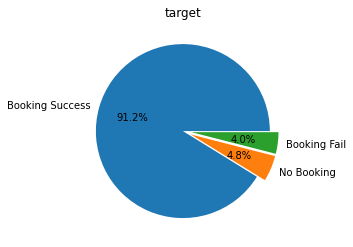

In [ ]:
explode = [0, 0.1, 0.1]

plt.pie(x = target['percentage'], labels = target['target'], autopct = '%.1f%%', explode=explode)
plt.title('target')
plt.show()

# Promotion

In [ ]:
promo_page = web_click[web_click.event_name == 'PROMO_PAGE']['session_id'].unique()
add_promo = web_click[web_click.event_name == 'ADD_PROMO']['session_id'].unique()
len(promo_page), len(add_promo)

(35076, 32697)

In [ ]:
len(set(promo_page) & set(add_promo))

17391

#### page to add

In [ ]:
page_add = len(set(promo_page) & set(add_promo))
page_add_no = len(set(promo_page) - set(add_promo))

In [ ]:
len(set(promo_page) - set(add_promo))

17685

In [ ]:
page_add, page_add_no

(17391, 17685)

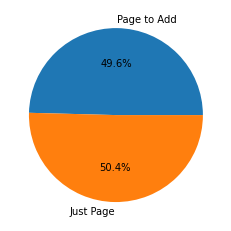

In [ ]:
labels = ['Page to Add', 'Just Page']
explode = [0, 0]
plt.pie([page_add, page_add_no], autopct='%.1f%%', labels=labels, explode=explode)
plt.show()

#### page to pay

In [ ]:
promo_page

array([46658, 67082,  8799, ..., 23057, 31430, 70905])

In [ ]:
prop_booking_succ = 0
prop_booking_fail = 0
prop_booking_no = 0

for sess in promo_page:
    temp = web_click[web_click.session_id==sess]
    if "BOOKING" in list(temp.event_name):
        if temp[temp.event_name == 'BOOKING']['payment_status'].iloc[0] == 'Success':
            prop_booking_succ += 1
        else:
            prop_booking_fail += 1
    else:
        prop_booking_no += 1   

In [ ]:
prop_booking_succ, prop_booking_fail, prop_booking_no

(31942, 1436, 1698)

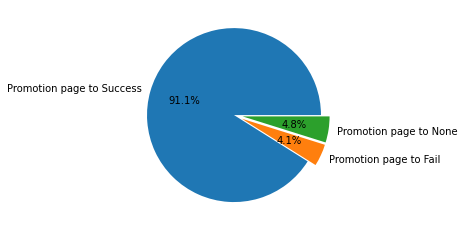

In [ ]:
labels = ['Promotion page to Success', 'Promotion page to Fail', 'Promotion page to None']
explode = [0, 0.1, 0.1]
plt.pie([prop_booking_succ, prop_booking_fail, prop_booking_no], autopct='%.1f%%', labels=labels, explode=explode)
plt.show()

#### add to pay

In [ ]:
add_booking_succ = 0
add_booking_fail = 0
add_booking_no = 0

for sess in add_promo:
    temp = web_click[web_click.session_id==sess]
    if "BOOKING" in list(temp.event_name):
        if temp[temp.event_name == 'BOOKING']['payment_status'].iloc[0] == 'Success':
            add_booking_succ += 1
        else:
            add_booking_fail += 1
    else:
        add_booking_no += 1

In [ ]:
add_booking_succ, add_booking_fail, add_booking_no

(31372, 1325, 0)

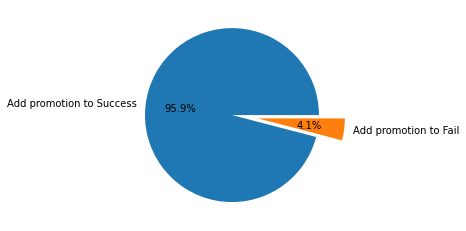

In [ ]:
labels = ['Add promotion to Success', 'Add promotion to Fail']
explode = [0, 0.3]
plt.pie([add_booking_succ, add_booking_fail], autopct='%.1f%%', labels=labels, explode=explode)
plt.show()

#### promotion preference

In [ ]:
web_click[['promo_code', 'year']].dropna(axis=0).reset_index(drop=True).groupby(['year', 'promo_code'])['promo_code'].count()

year  promo_code   
2016  AZ2022             73
      BUYMORE            54
      LIBURDONG          17
      SC2022              7
      STARTUP             9
      WEEKENDMANTAP      21
      WEEKENDSERU        54
      XX2022             29
2017  AZ2022            421
      BUYMORE           301
      LIBURDONG         103
      SC2022             55
      STARTUP            43
      WEEKENDMANTAP     112
      WEEKENDSERU       315
      XX2022            203
2018  AZ2022            815
      BUYMORE           670
      LIBURDONG         215
      SC2022            110
      STARTUP           107
      WEEKENDMANTAP     237
      WEEKENDSERU       658
      XX2022            419
2019  AZ2022           1473
      BUYMORE          1058
      LIBURDONG         377
      SC2022            205
      STARTUP           173
      WEEKENDMANTAP     335
      WEEKENDSERU       986
      XX2022            697
2020  AZ2022           1962
      BUYMORE          1499
      LIBURDONG         494


In [ ]:
promo_year = pd.DataFrame(web_click[['promo_code', 'year']].dropna(axis=0).reset_index(drop=True).groupby(['promo_code', 'year'])['promo_code'].size().reset_index(name='counts'))
promo_year

,promo_code,year,counts
0,AZ2022,2016,73
1,AZ2022,2017,421
2,AZ2022,2018,815
3,AZ2022,2019,1473
4,AZ2022,2020,1962
5,AZ2022,2021,2526
6,AZ2022,2022,1640
7,BUYMORE,2016,54
8,BUYMORE,2017,301
9,BUYMORE,2018,670


In [ ]:
for code in promo_year.promo_code.unique():
    print(code)

AZ2022
BUYMORE
LIBURDONG
SC2022
STARTUP
WEEKENDMANTAP
WEEKENDSERU
XX2022


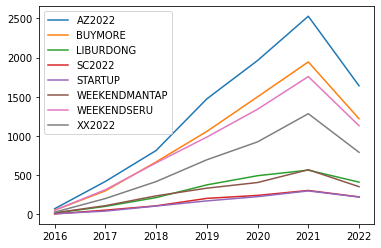

In [191]:
for code in promo_year.promo_code.unique():
    plt.plot(promo_year[promo_year.promo_code == code].set_index('year', drop=True)['counts'])

plt.legend(promo_year.promo_code.unique())
plt.show()